 Return of a Portfolio of Securities

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
#Load the data
tickers = ['ADBE', 'SPOT', 'BJ', 'DIS', 'FB','BABA', 'LOW', 'NLS', 'SOLO','NEM']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2016-1-1')['Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2016-01-04 to 2021-03-08
Data columns (total 10 columns):
ADBE    1303 non-null float64
SPOT    738 non-null float64
BJ      677 non-null float64
DIS     1303 non-null float64
FB      1303 non-null float64
BABA    1303 non-null float64
LOW     1303 non-null float64
NLS     1303 non-null float64
SOLO    648 non-null float64
NEM     1303 non-null float64
dtypes: float64(10)
memory usage: 112.0 KB


In [5]:
mydata.head()

,ADBE,SPOT,BJ,DIS,FB,BABA,LOW,NLS,SOLO,NEM
Date,,,,,,,,,,
2016-01-04,91.970001,NaN,NaN,102.980003,102.220001,76.690002,75.279999,18.480000,NaN,18.440001
2016-01-05,92.339996,NaN,NaN,100.900002,102.730003,78.629997,75.440002,20.350000,NaN,18.420000
2016-01-06,91.019997,NaN,NaN,100.360001,102.970001,77.330002,73.940002,21.040001,NaN,18.559999
2016-01-07,89.110001,NaN,NaN,99.500000,97.919998,72.720001,72.070000,19.900000,NaN,18.860001
2016-01-08,87.849998,NaN,NaN,99.250000,97.330002,70.800003,70.879997,19.360001,NaN,18.010000


In [6]:
mydata.tail()

,ADBE,SPOT,BJ,DIS,FB,BABA,LOW,NLS,SOLO,NEM
Date,,,,,,,,,,
2021-03-02,466.589996,322.739990,38.830002,193.940002,259.000000,234.419998,163.050003,20.430000,6.15,56.799999
2021-03-03,448.450012,300.239990,38.599998,192.259995,255.410004,236.270004,158.289993,19.280001,5.66,55.330002
2021-03-04,439.059998,285.010010,38.180000,188.029999,257.640015,230.500000,153.770004,19.059999,5.37,55.419998
2021-03-05,440.829987,274.980011,39.099998,189.990005,264.279999,233.889999,158.580002,19.360001,5.05,56.740002
2021-03-08,421.200012,258.329987,40.639999,201.910004,255.309998,226.690002,162.919998,18.410000,4.88,56.389999


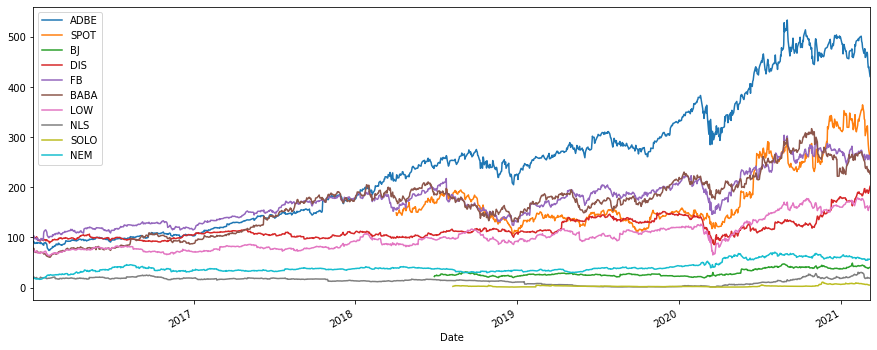

In [7]:
mydata.plot(figsize = (15, 6))
plt.show()

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [8]:
mydata.iloc[0]

ADBE     91.970001
SPOT           NaN
BJ             NaN
DIS     102.980003
FB      102.220001
BABA     76.690002
LOW      75.279999
NLS      18.480000
SOLO           NaN
NEM      18.440001
Name: 2016-01-04 00:00:00, dtype: float64

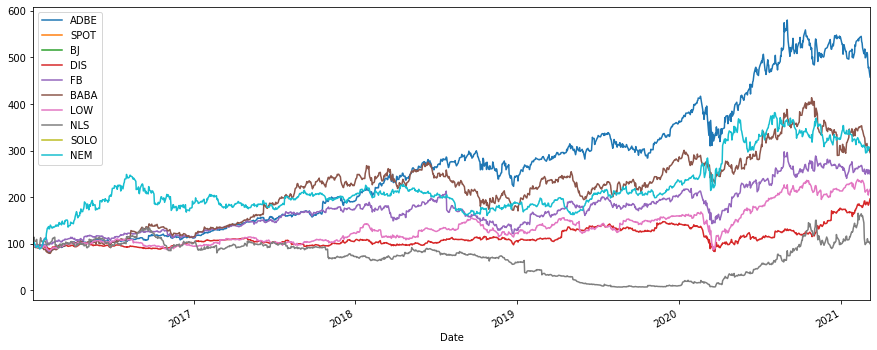

In [9]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

*****

Calculating the Return 

In [10]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,ADBE,SPOT,BJ,DIS,FB,BABA,LOW,NLS,SOLO,NEM
Date,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.004023,NaN,NaN,-0.020198,0.004989,0.025297,0.002125,0.101191,NaN,-0.001085
2016-01-06,-0.014295,NaN,NaN,-0.005352,0.002336,-0.016533,-0.019883,0.033907,NaN,0.007600
2016-01-07,-0.020984,NaN,NaN,-0.008569,-0.049043,-0.059615,-0.025291,-0.054183,NaN,0.016164
2016-01-08,-0.014140,NaN,NaN,-0.002513,-0.006025,-0.026403,-0.016512,-0.027136,NaN,-0.045069


In [11]:
change=mydata.pct_change()
change.head()

,ADBE,SPOT,BJ,DIS,FB,BABA,LOW,NLS,SOLO,NEM
Date,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.004023,NaN,NaN,-0.020198,0.004989,0.025297,0.002125,0.101191,NaN,-0.001085
2016-01-06,-0.014295,NaN,NaN,-0.005352,0.002336,-0.016533,-0.019883,0.033907,NaN,0.007600
2016-01-07,-0.020984,NaN,NaN,-0.008569,-0.049043,-0.059615,-0.025291,-0.054183,NaN,0.016164
2016-01-08,-0.014140,NaN,NaN,-0.002513,-0.006025,-0.026403,-0.016512,-0.027136,NaN,-0.045069


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

Make sre portfolios weight must sum up to 1

In [12]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20,0.20, 0.20, 0.20, 0.20, 0.20])

In [13]:
annual_returns = returns.mean() * 250
annual_returns

ADBE    0.343641
SPOT    0.292772
BJ      0.324918
DIS     0.168168
FB      0.229891
BABA    0.264416
LOW     0.199123
NLS     0.335112
SOLO    1.494796
NEM     0.277499
dtype: float64

In [14]:
np.dot(annual_returns, weights)

0.7860672863520194

In [15]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

78.607 %


In [16]:
weights_2 = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.05, 0.10, 0.20, 0.05])

In [17]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_2)

62.193 %


In [18]:
weights_3 = np.array([0.20, 0.05, 0.15, 0.20, 0.40,0.10, 0.25, 0.20, 0.10, 0.05])

In [19]:
pfolio_3 = str(round(np.dot(annual_returns, weights_3), 5) * 100) + ' %'
print ('pfolio_3 is '+pfolio_3)
print ('pfolio_2 is '+pfolio_2)
print ('pfolio_1 is '+ pfolio_1)

pfolio_3 is 56.428999999999995 %
pfolio_2 is 62.193 %
pfolio_1 is 78.607 %


###   choosen stocks 

1. Adobe (ADBE)
2. Spotify Technology (SPOT)
3. BJ's Wholesale Club (BJ)
4. The Walt Disney Co. (DIS)
5. Facebook (FB)
6. Alibaba Group (BABA)
7. Lowe's Cos. (LOW)
8. Nautilus (NLS)
9. Sonos (SONO)
10. Newmont Corp. (NEM)


### Reason for choosing those stocks 

In [ ]:
Our team would like to create a portfoli